In [82]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
train_df = pd.read_csv('../Titanic/train.csv')
test_df = pd.read_csv('../Titanic/test.csv')
combine = [train_df, test_df]
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [85]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"White, Mr. Percival Wayland",male,1601,G6,S
freq,1,577,7,4,644


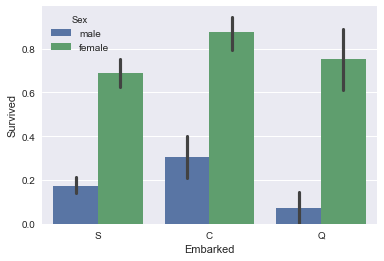

In [87]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_df);

In [88]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [89]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [90]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()\
.sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


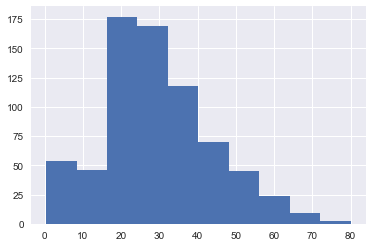

In [91]:
sns.set()
train_df['Age'].hist(bins=10)

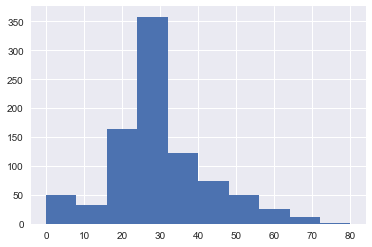

In [92]:
for dataset in combine:
    dataset['Age'] = dataset['Age']\
    .transform(lambda x: x.fillna(x.mean())).astype(int)
#train_df['Age'].fillna(train_df['Age'].dropna().mean(), inplace=True)

#df['value'] = df.groupby(['category', 'name'])['value']\
 #   .transform(lambda x: x.fillna(x.mean()))
train_df['Age'].hist(bins=10)

In [93]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [94]:
for dataset in combine:
    dataset['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

In [95]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()\
.sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [96]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,0,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,3,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,1,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,3,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,1,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,29,0,0,330877,1,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,3,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,2,NaN,S,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,1,NaN,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,2,NaN,C,2


In [97]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)

In [98]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,66,22,3
1,38,38,1
2,78,26,3
3,35,35,1
4,105,35,3
5,87,29,3
6,54,54,1
7,6,2,3
8,81,27,3
9,28,14,2


In [99]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    

In [100]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df=train_df.drop("Name",axis=1)
test_df=test_df.drop("Name",axis=1)
train_df=train_df.drop("Cabin",axis=1)
test_df=test_df.drop("Cabin",axis=1)
train_df=train_df.drop("Ticket",axis=1)
test_df=test_df.drop("Ticket",axis=1)
combine =[train_df,test_df]

In [101]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((891, 10), (891,), (418, 10))

In [102]:
X_train.head(), X_test.head()

(   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  \
 0            1       3    0   22      1      0     0         0           2   
 1            2       1    1   38      1      0     3         1           2   
 2            3       3    1   26      0      0     1         0           1   
 3            4       1    1   35      1      0     3         0           2   
 4            5       3    0   35      0      0     1         0           1   
 
    Age*Class  
 0         66  
 1         38  
 2         78  
 3         35  
 4        105  ,
    PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  FamilySize  \
 0          892       3    0   34      0      0     0         2           1   
 1          893       3    1   47      1      0     0         0           2   
 2          894       2    0   62      0      0     1         2           1   
 3          895       3    0   27      0      0     1         0           1   
 4          896       3    1   2

In [103]:

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.57

In [104]:

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

80.36

In [105]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45